# Matin Ghorbani 6.8.Assignment
---

## Import Dependencies

### Read Train Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

2023-12-13 20:21:43.809501: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 20:21:43.833707: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 20:21:43.833729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 20:21:43.833747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 20:21:43.838372: I tensorflow/core/platform/cpu_feature_g

In [3]:
train_dataset = pd.read_csv('./datasets/titanic_train.csv')
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_dataset.replace(['female', 'male'], [0, 1], inplace=True)
train_dataset.fillna(0, inplace=True)
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


In [5]:
train_dataset.corr()

/tmp/ipykernel_38532/2043526507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.361353,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.024978,-0.114631,-0.245489,-0.182333
Age,0.038125,0.010539,-0.361353,0.024978,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.135516,0.159651,0.216225,1.000000


In [6]:
x_train = np.array(train_dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
y_train = np.array(train_dataset[['Survived']])

## Implement a Multy Layer Perceptron Neural Network for this classification task

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(6, activation=keras.activations.sigmoid),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(32, activation=keras.activations.sigmoid),
    keras.layers.Dense(2, activation=keras.activations.softmax)
])

2023-12-13 20:06:04.107644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-13 20:06:04.168835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-13 20:06:04.168973: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=.01), 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

### Fit your model on train dataset

In [9]:
outputs = model.fit(x_train, y_train, epochs=350)

Epoch 1/350


2023-12-13 20:07:07.426912: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-13 20:07:07.679127: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb4dc003310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-13 20:07:07.679145: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-13 20:07:07.683882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-13 20:07:07.696321: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2023-12-13 20:07:07.757193: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - 1s 2ms/step - loss: 0.6758 - accuracy: 0.6128
Epoch 2/350
28/28 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.6319
Epoch 3/350
28/28 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6790
Epoch 4/350
28/28 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.6678
Epoch 5/350
28/28 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.6846
Epoch 6/350
28/28 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.6925
Epoch 7/350
28/28 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.6914
Epoch 8/350
28/28 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7160
Epoch 9/350
28/28 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7351
Epoch 10/350
28/28 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7587
Epoch 11/350
28/28 [=

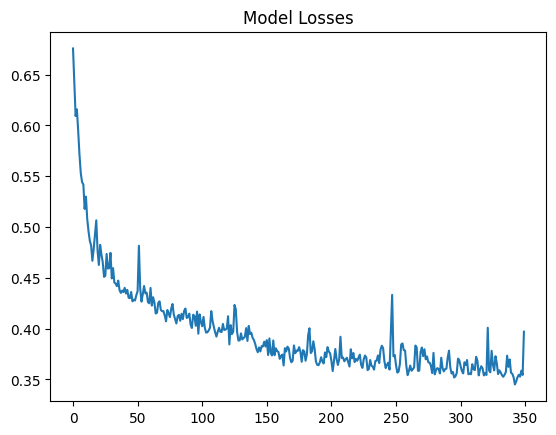

In [10]:
plt.plot(outputs.history['loss'])
plt.title('Model Losses')
plt.show()

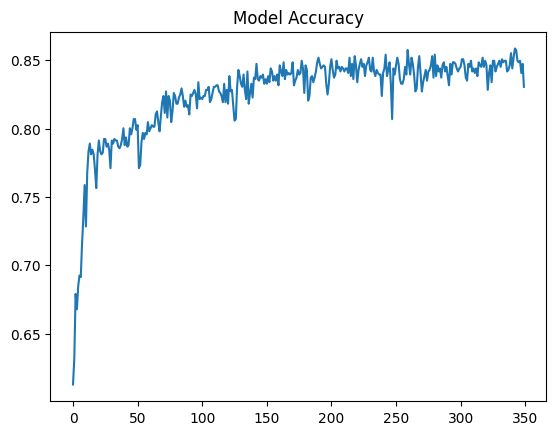

In [11]:
plt.plot(outputs.history['accuracy'])
plt.title('Model Accuracy')
plt.show()

## Evaluate our model on test dataset (You should achieve an accuracy > 90%)

In [7]:
test_dataset = pd.read_csv('./datasets/titanic_test.csv')
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_dataset.replace(['female', 'male'], [0, 1], inplace=True)
test_dataset.fillna(0, inplace=True)
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S


In [9]:
test_gender_submision = pd.read_csv('./datasets/titanic_gender_submission.csv')
test_gender_submision.head(7)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1


In [10]:
test_dataset['Survived'] = test_gender_submision['Survived']
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S,1


In [11]:
x_test = np.array(test_dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
y_test = np.array(test_dataset[['Survived']])

In [19]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.9354


[0.4982907474040985, 0.9354066848754883]

## Calculate precision and recall

In [20]:
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder


predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int)

encoder = OneHotEncoder()
y_test = np.array(y_test)
encoded_y_test = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))

precision = precision_score(encoded_y_test, predictions, average='macro')
recall = recall_score(encoded_y_test, predictions, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

14/14 [==============================] - 0s 642us/step
Precision: 0.9246513720197931
Recall: 0.943609022556391


## Predict our model on Jack and Rose data

In [21]:
jack_data = {'Pclass': 3, 'Sex': 1, 'Age': 23, 'SibSp': 0, 'Parch': 0, 'Fare': 5.0}
rose_data = {'Pclass': 1, 'Sex': 0, 'Age': 20, 'SibSp': 1, 'Parch': 2, 'Fare': 100.0}

jack_df = pd.DataFrame([jack_data])
rose_df = pd.DataFrame([rose_data])

jack_df.replace({'female': 0, 'male': 1}, inplace=True)
rose_df.replace({'female': 0, 'male': 1}, inplace=True)

jack_prediction = model.predict(np.array(jack_df))
rose_prediction = model.predict(np.array(rose_df))

# jack_prediction = (jack_prediction > 0.5).astype(int)
# rose_prediction = (rose_prediction > 0.5).astype(int)

print(f'Jack Prediction: {jack_prediction[0]}')
print(f'Ros Prediction: {rose_prediction[0]}')


1/1 [==============================] - 0s 13ms/step
Jack Prediction: [0.7803365  0.21966355]
Ros Prediction: [0.03411492 0.9658851 ]


## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

/home/matin/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6698564593301436

## Perceptron

In [13]:
from perceptron import Perceptron

perceptron = Perceptron(lr_w=.001, lr_b=.001, epochs=350)
perceptron.fit(x_train, y_train)
perceptron.calculate_accuracy(x_test, y_test, metric='sigmoid')

Epoch 1 done.
Epoch 2 done.
Epoch 3 done.
Epoch 4 done.
Epoch 5 done.
Epoch 6 done.
Epoch 7 done.
Epoch 8 done.
Epoch 9 done.
Epoch 10 done.
Epoch 11 done.
Epoch 12 done.
Epoch 13 done.
Epoch 14 done.
Epoch 15 done.
Epoch 16 done.
Epoch 17 done.
Epoch 18 done.
Epoch 19 done.
Epoch 20 done.
Epoch 21 done.
Epoch 22 done.
Epoch 23 done.
Epoch 24 done.
Epoch 25 done.
Epoch 26 done.
Epoch 27 done.
Epoch 28 done.
Epoch 29 done.
Epoch 30 done.
Epoch 31 done.
Epoch 32 done.
Epoch 33 done.
Epoch 34 done.
Epoch 35 done.
Epoch 36 done.
Epoch 37 done.
Epoch 38 done.
Epoch 39 done.
Epoch 40 done.
Epoch 41 done.
Epoch 42 done.
Epoch 43 done.
Epoch 44 done.
Epoch 45 done.
Epoch 46 done.
Epoch 47 done.
Epoch 48 done.
Epoch 49 done.
Epoch 50 done.
Epoch 51 done.
Epoch 52 done.
Epoch 53 done.
Epoch 54 done.
Epoch 55 done.
Epoch 56 done.
Epoch 57 done.
Epoch 58 done.
Epoch 59 done.
Epoch 60 done.
Epoch 61 done.
Epoch 62 done.
Epoch 63 done.
Epoch 64 done.
Epoch 65 done.
Epoch 66 done.
Epoch 67 done.
Epoc

0.6945773524720893